### Prerequisite for XGBoost package

In [ ]:
pip install xgboost

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">
    1.1 Load required libraries
    </span></div>

In [45]:
# Numerical libraries
import numpy as np

# To handle data in form of rows and columns
import pandas as pd

# Importing Ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing seaborn for statistical plots
import seaborn as sns

#Importing Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Preprocessing
#Import Library related to LabelEncoder ,StandardScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score,roc_auc_score,roc_curve,recall_score,precision_score,f1_score

#Balancing Technique
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

# To suppress un-necessary warnings
import warnings

warnings.filterwarnings("ignore")


<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">PART ONE | TOTAL | 30 </span></div>

## Domain: Telecom

## Context:

A telecom company wants to use their historical customer data to predict behaviour to retain
customers. You can analyse all relevant customer data and develop focused customer retention
programs.

## Data Description:
Each row represents a customer, each column contains customer’s attributes described on the
column Metadata. The data set includes information about:

● Customers who left within the last month – the column is called Churn

● Services that each customer has signed up for – phone, multiple lines, internet, online security, online
backup, device protection, tech support, and streaming TV and movies

● Customer account information – how long they’ve been a customer, contract, payment method,
paperless billing, monthly charges, and total charges

● Demographic info about customers – gender, age range, and if they have partners and dependents

## Project Objective:

Build a model that will help to identify the potential customers who have a higher probability to churn.
This helps the company to understand the pinpoints and patterns of customer churn and will increase the
focus on strategizing customer retention.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">Steps and Tasks:</span>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">
    1. Data Understanding and Exploration: 5</span></div>

### a. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [46]:
# Creating the dataframe and import dataset
df_Churn1 = pd.read_csv("TelcomCustomer-Churn_1.csv")

In [47]:
# Check top 5  records of Data Set
df_Churn1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [48]:
# Check bottom 5  records of Data Set
df_Churn1.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  
7038          Yes               Yes             DSL            Yes  
7039          Yes               Yes     Fiber optic             No  
7040           No  No phone service             DSL            Yes  
7041          Yes               Yes     Fiber optic             No  
7042          Yes                No     Fiber optic            Yes

In [49]:
# Check the dimensionality of the DataFrame
df_Churn1.shape

(7043, 10)

### b. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [50]:
# Creating the dataframe and import dataset
df_Churn2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [51]:
# Check top 5  records of Data Set
df_Churn2.head()

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes

In [52]:
# Check bottom 5  records of Data Set
df_Churn2.tail()

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
7038  6840-RESVB           No              Yes         Yes         Yes   
7039  2234-XADUH          Yes              Yes          No         Yes   
7040  4801-JZAZL           No               No          No          No   
7041  8361-LTMKD           No               No          No          No   
7042  3186-AJIEK           No              Yes         Yes         Yes   

     StreamingMovies        Contract PaperlessBilling  \
7038             Yes        One year              Yes   
7039             Yes        One year              Yes   
7040              No  Month-to-month              Yes   
7041              No  Month-to-month              Yes   
7042             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
7038               Mailed check           84.80       1990.5    No  
7039    Credit card (automatic)          103.20       7362.9    No  
7040           Electronic check           29.60       346.45    No  
7041               Mailed check           74.40        306.6   Yes  
7042  Bank transfer (automatic)          105.65       6844.5    No

In [53]:
# Check the dimensionality of the DataFrame
df_Churn2.shape

(7043, 12)

### c. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]

In [54]:
# Merge 2 dataframes on "customerID"
df_Telecom = pd.merge(df_Churn1, df_Churn2, how="inner", on="customerID")

# Dimensionality of new DataFrame
df_Telecom.shape

(7043, 21)

In [55]:
# Check top 5  records of Data Set
df_Telecom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [56]:
# Check bottom 5  records of Data Set
df_Telecom.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

### d. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

In [57]:
print(
    "DataFrames",
    "\tRows",
    "\tColumns" "\ndf_Churn1\t",
    df_Churn1.shape[0],
    "\t",
    df_Churn1.shape[1],
    "\n\ndf_Churn2\t",
    df_Churn2.shape[0],
    "\t",
    df_Churn2.shape[1],
    "\n\ndf_Telecom\t",
    df_Telecom.shape[0],
    "\t",
    df_Telecom.shape[1]
)



DataFrames 	Rows 	Columns
df_Churn1	 7043 	 10 

df_Churn2	 7043 	 12 

df_Telecom	 7043 	 21


In [58]:
df_Churn1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [59]:
df_Churn2.columns

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [60]:
df_Telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
**Observed that there are total 10 columns in df_Churn1 dataframe and 12 columns in df_Churn2 dataframe 

After merge on customerID the new dataframe consist 21 Columns(customerID column is key)
Hence merge is successful
**
    </span>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 2. Data Cleaning and Analysis : 15
    </span></div>

### a. Impute missing/unexpected values in the DataFrame. [2 Marks]

In [61]:
# Check for null values
df_Telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
**Observed :There are no null values in dataframe
**
    </span>

In [62]:
# Check for space in any columns
for col in df_Telecom.select_dtypes(include=["object"]):
    print(col, df_Telecom[col].str.isspace().sum())

customerID 0
gender 0
Partner 0
Dependents 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
TotalCharges 11
Churn 0


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
**Observed :Column TotalCharges  has 11 rows with a space ,hence to be imputed with mode
**
    </span>

In [63]:
# Replace space with mode
df_Telecom.TotalCharges.loc[
    df_Telecom["TotalCharges"].str.isspace()
] = df_Telecom.TotalCharges.mode()[1]

In [64]:
# Check for any space
df_Telecom.TotalCharges.str.isspace().sum()

0

In [65]:
df_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
**Observed :
All columns in df_Telecom dataframe are of "object" Datatype except

    
SeniorCitizen and tenure are of "int64"

MonthlyCharges id "float64"
**
    </span>

### Check for unexpected values in each  variable of type"Object" and impute with best suitable value

In [2]:
for col in df_Telecom.select_dtypes(include=["object"]):
    print(col, df_Telecom[col].unique())

NameError: name 'df_train' is not defined

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
**Observed :
    
Below columns to have only  Yes no values hence to be updated wherever required

    
Columns "MultipleLines has 3 values['No phone service' 'No' 'Yes'] hence 'No phone service' to be updated with "No"
    
OnlineSecurity,OnlineBackup ,DeviceProtection ,TechSupport ,StreamingTV ,StreamingMovies has 3 values['No' 'Yes' 'No internet service']  hence 'No internet service' to be updated with "No"
**
    </span>

In [67]:
# Update value of column MultipleLines "No phone service" to  "No"
df_Telecom.MultipleLines.loc[df_Telecom["MultipleLines"] == "No phone service"] = "No"

# Check Unique values
df_Telecom.MultipleLines.value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [68]:
# Update value of column  "No internet service" to  "No"
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for col in cols:
    df_Telecom[col].loc[df_Telecom[col] == "No internet service"] = "No"
    # Check Unidf_Telecomque values
    print(df_Telecom[col].value_counts())



No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


### b. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
[For Example: MonthlyCharges, TotalCharges]

In [69]:
# TotalCharges id of type object to to converted to float
df_Telecom.TotalCharges = df_Telecom.TotalCharges.astype("float64")
df_Telecom.TotalCharges.dtypes

dtype('float64')

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue"> Drop customerID  column because the customerID does not determine the probability that someone will churn or not</span>

In [70]:
df_Telecom = df_Telecom.drop("customerID", axis=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue"> The column 'SeniorCitizen' is a categorical column by its nature with 'Yes' as 1, and No as 0. So it shuold be converted into Categorical type</span>

In [71]:
# SeniorCitizen of type int64 to to converted to object
df_Telecom.SeniorCitizen = df_Telecom.SeniorCitizen.astype("object")
df_Telecom.SeniorCitizen.dtypes

dtype('O')

In [72]:
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df_Telecom[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.765853
std      24.559481       30.090047   2266.762876
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
Visualize a boxplot to check distribution of the features
</span>

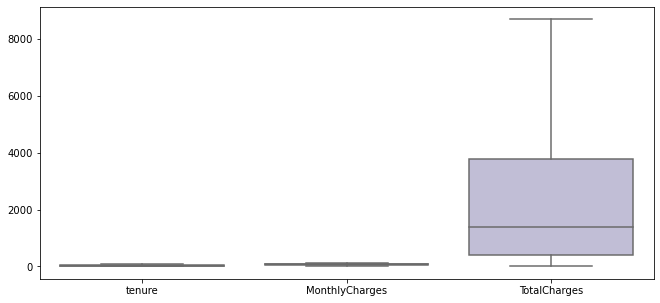

In [73]:
f, ax = plt.subplots(figsize=(11, 5))
sns.boxplot(data=df_Telecom[numerical_cols], palette="Set3")
plt.show()

In [74]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return outliers

In [75]:
col = numerical_cols
TotalOutliers = 0

for i in col:
    sample_outliers = []
    sample_outliers = detect_outliers_iqr(df_Telecom[i])
    print("\n\nTotal Number of outliers in ", i, "is :", len(sample_outliers))



Total Number of outliers in  tenure is : 0


Total Number of outliers in  MonthlyCharges is : 0


Total Number of outliers in  TotalCharges is : 0


### c. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. [4 Marks]

In [76]:
# Function to plot pie charts for all categorical features
def PercentageDistribution(df):
    #  cols = df.columns.shape[0]

    #     if cols > 3:
    #         rows = int(df.columns.shape[0] / 2)
    #     else:
    #         rows = 2
    #     print(cols, rows)
    fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 25))
    for i, col in enumerate(df):
        # Creating dataset
        data = df[col].value_counts().values.tolist()

        labels = df[col].value_counts().index.tolist()

        title = col

        # Creating explode data
        explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

        # define Seaborn color palette to use
        colors = sns.color_palette("bright")[0:5]
        # Wedge properties
        wp = {"linewidth": 1, "edgecolor": "green"}

        # Creating plot
        ax = axes[i // 2, i % 2]
        wedges, texts, autotexts = ax.pie(
            data,
            # explode=explode,
            labels=labels,
            shadow=True,
            colors=colors,
            startangle=90,
            wedgeprops=wp,
            autopct="%.0f%%",
        )

        # Adding legend
        ax.legend(wedges, labels, title=title, bbox_to_anchor=(1.5, 0, 0.5, 1))
        ax.set_title(title,)

    # show plot
    plt.show()

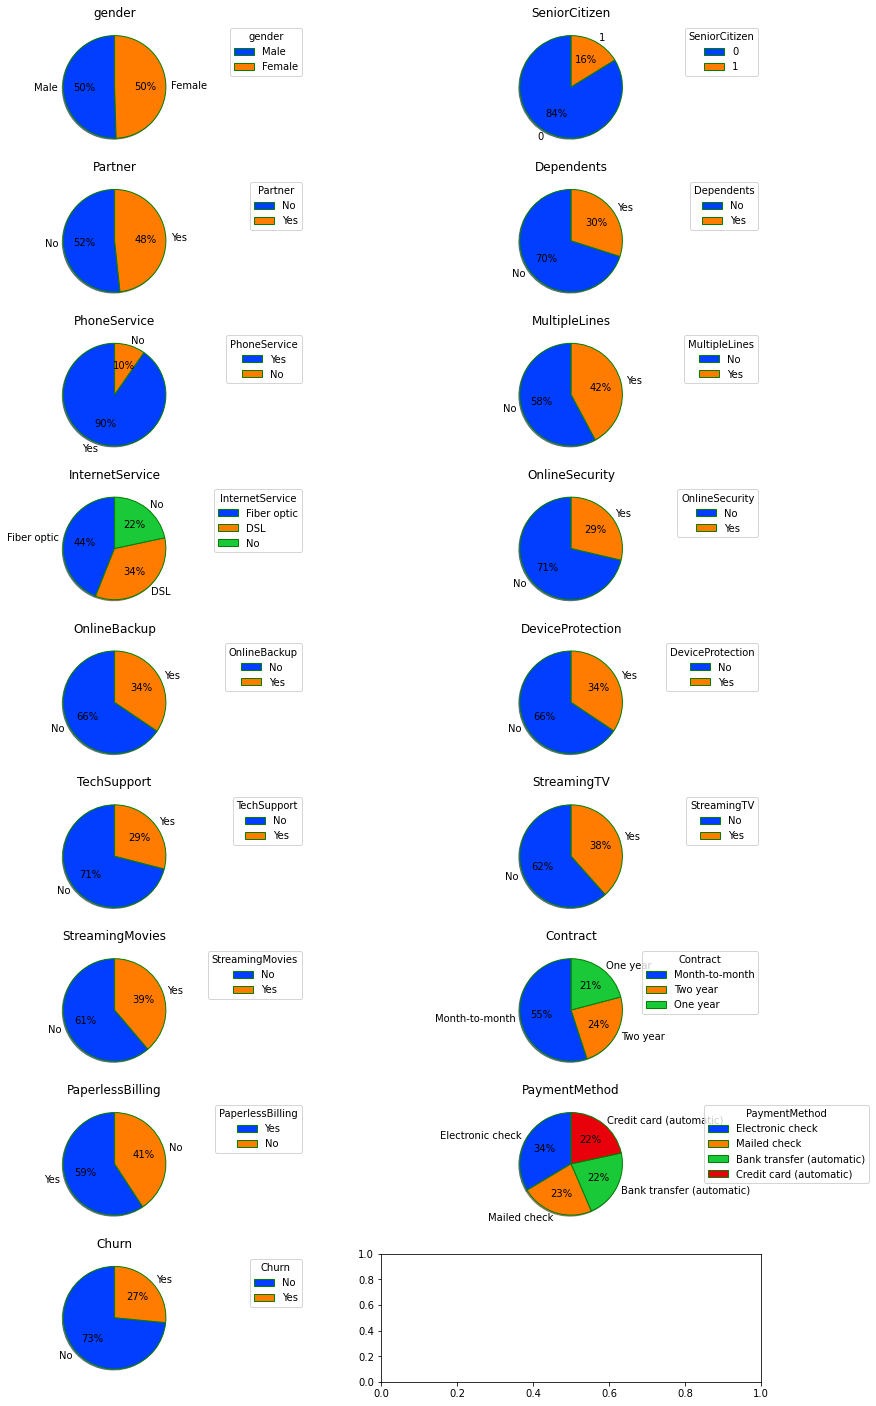

In [77]:
## Percentage distribution for all categorical features
PercentageDistribution(df_Telecom.select_dtypes(include=["object"]))

In [78]:
df_Telecom.sample(5)

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
5184  Female             0     Yes         No      68          Yes   
3772    Male             0     Yes         No       1          Yes   
4429  Female             0     Yes        Yes      70          Yes   
2137    Male             0     Yes        Yes      12          Yes   
6599  Female             0     Yes         No      13          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
5184           Yes     Fiber optic            Yes          Yes   
3772            No     Fiber optic            Yes           No   
4429           Yes             DSL            Yes          Yes   
2137           Yes              No             No           No   
6599           Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5184               No          No          No              No        Two year   
3772               No          No         Yes             Yes  Month-to-month   
4429              Yes         Yes         Yes              No        Two year   
2137               No          No          No              No        Two year   
6599              Yes          No         Yes              No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
5184              Yes  Bank transfer (automatic)            84.7   
3772              Yes           Electronic check            95.0   
4429               No  Bank transfer (automatic)            79.7   
2137              Yes  Bank transfer (automatic)            25.4   
6599               No           Electronic check            94.1   

      TotalCharges Churn  
5184       5711.05    No  
3772         95.00   Yes  
4429       5743.30    No  
2137        313.00    No  
6599       1215.60   Yes

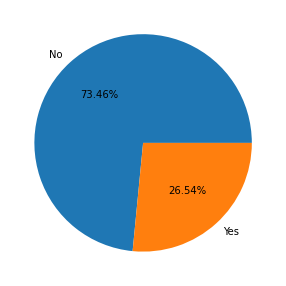

In [79]:
plt.figure(figsize=(10, 5))
plt.pie(
    df_Telecom["Churn"].value_counts(),
    labels=df_Telecom["Churn"].unique(),
    autopct="%.2f%%",
)
plt.show()

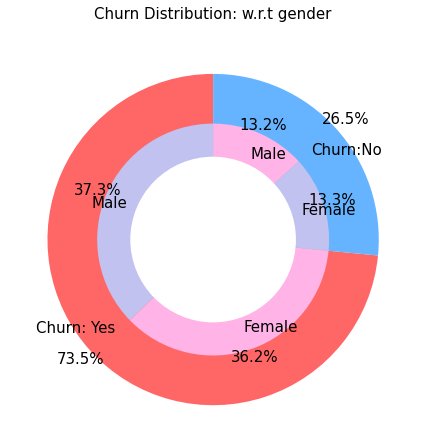

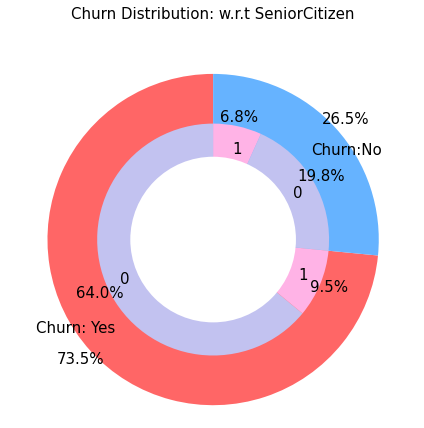

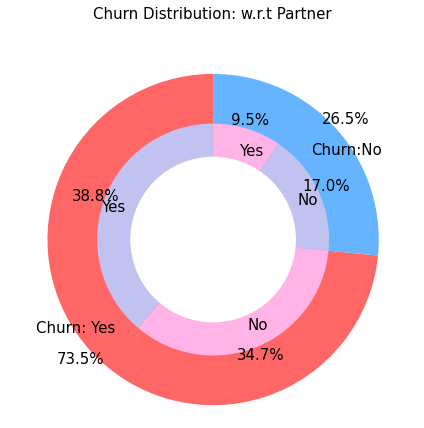

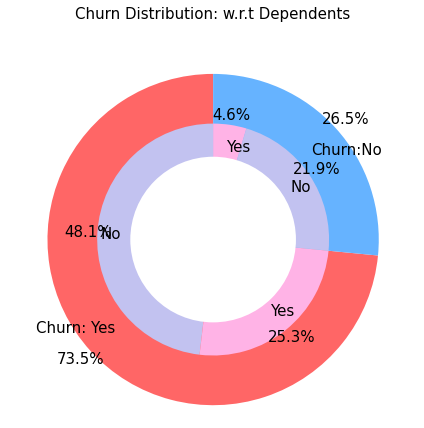

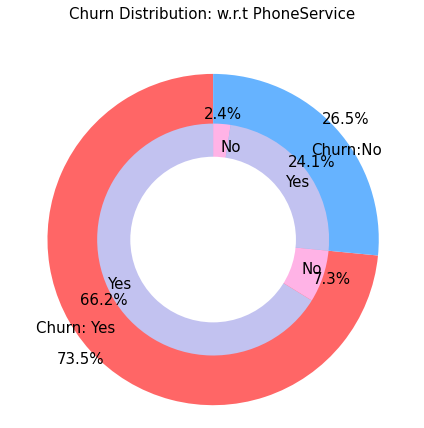

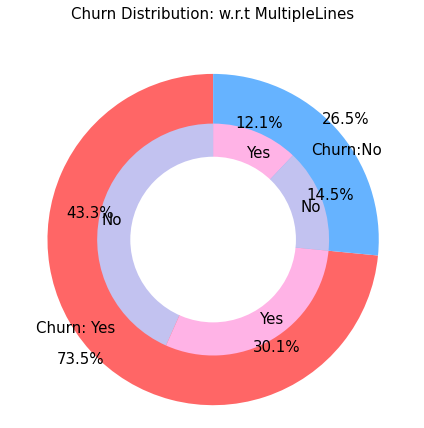

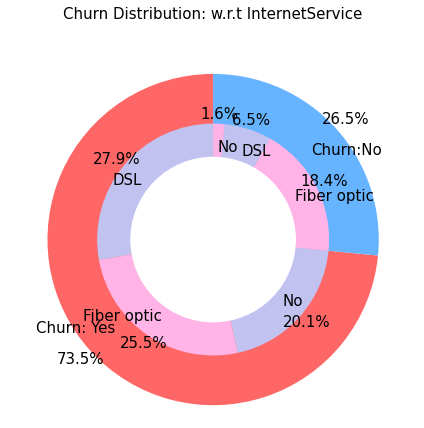

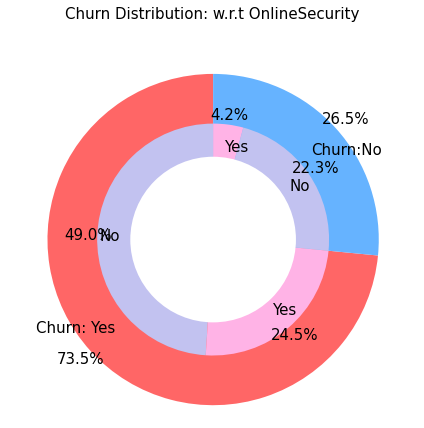

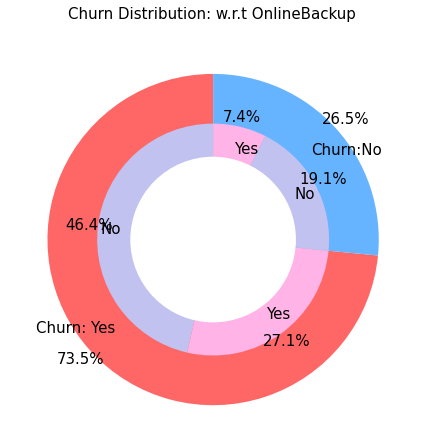

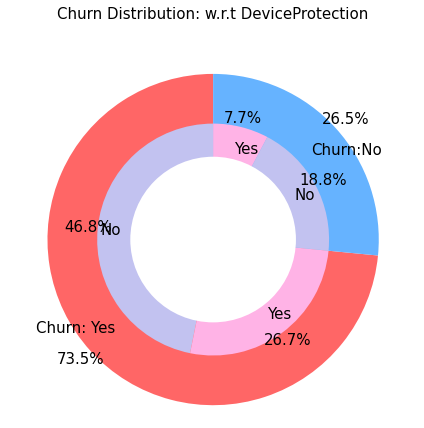

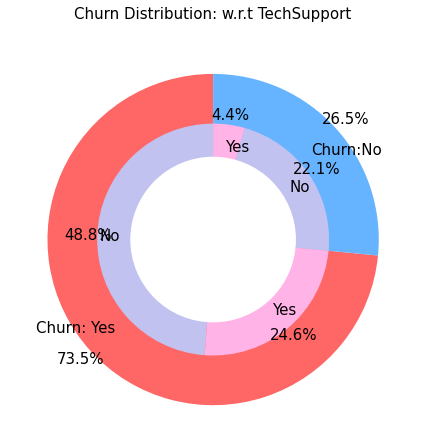

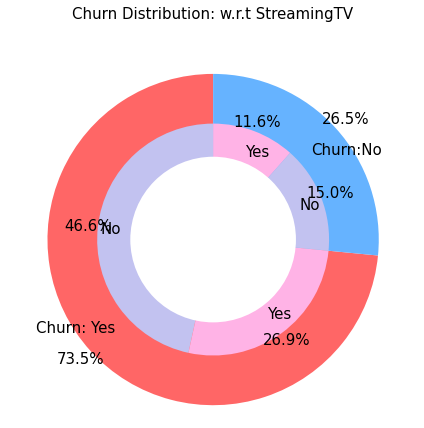

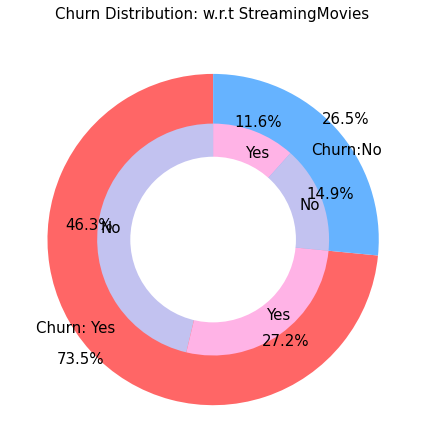

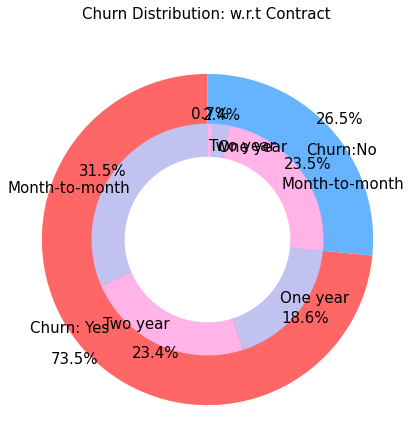

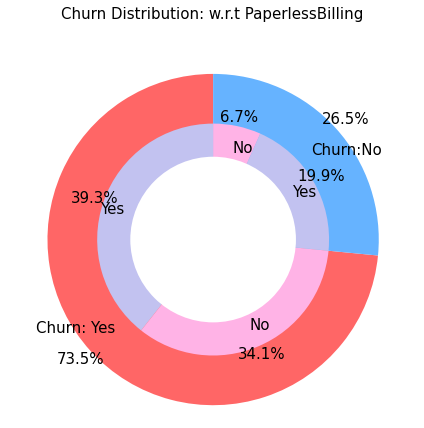

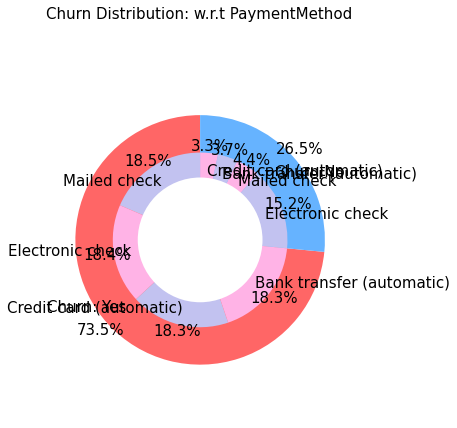

In [80]:
df = df_Telecom.select_dtypes(include=["object"])
for i, col in enumerate(df):
    # Creating dataset
    if col != "Churn":
        data_by_col = pd.DataFrame(
            df.groupby("Churn")[col]
            .value_counts()
            .to_frame()
            .rename(columns={col: "Count"})
            .reset_index()
            .sort_values("Churn")
        )

        plt.figure(figsize=(6, 6))
        labels = ["Churn: Yes", "Churn:No"]
        values = df["Churn"].value_counts().values.tolist()
        labels_gender = data_by_col[col].values.tolist()
        #  print(labels_gender)
        sizes_gender = data_by_col["Count"].values.tolist()
        # print(sizes_gender)
        colors = ["#ff6666", "#66b3ff"]
        colors_gender = ["#c2c2f0", "#ffb3e6", "#c2c2f0", "#ffb3e6"]
        explode = (0.3, 0.3)
        explode_gender = (0.1, 0.1, 0.1, 0.1)
        textprops = {"fontsize": 15}
        # Plot
        plt.pie(
            values,
            labels=labels,
            autopct="%1.1f%%",
            pctdistance=1.08,
            labeldistance=0.8,
            colors=colors,
            startangle=90,
            frame=True,
            radius=10,
            textprops=textprops,
            counterclock=True,
        )
        plt.pie(
            sizes_gender,
            labels=labels_gender,
            autopct="%1.1f%%",
            pctdistance=1.08,
            labeldistance=0.8,
            colors=colors_gender,
            startangle=90,
            radius=7,
            textprops=textprops,
            counterclock=True,
        )
        # Draw circle
        centre_circle = plt.Circle((0, 0), 5, color="black", fc="white", linewidth=0)
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        title = "Churn Distribution: w.r.t " + col
        plt.title(title, fontsize=15, y=1.1)

        # show plot

        plt.axis("equal")
        plt.tight_layout()

        plt.show()

In [81]:

def churn_CountPlot(df):
    for i, col in enumerate(df):
        fig = px.histogram(df, x="Churn", color=col, barmode="group", title="<b>Customer "+col+" distribution<b>")
        fig.update_layout(width=700, height=500, bargap=0.1)
        fig.show()


In [82]:
churn_CountPlot(df_Telecom.select_dtypes(include=["object"]))

In [83]:
def distplot(feature, frame, color="r"):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color=color)

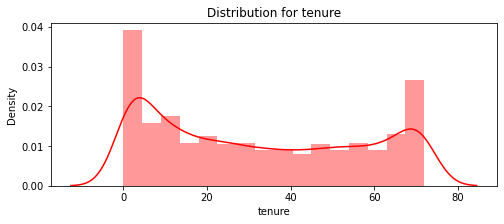

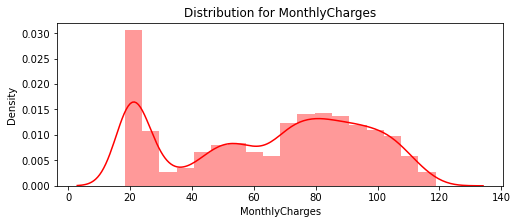

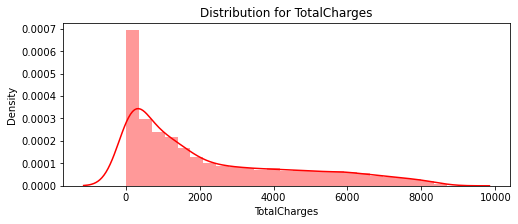

In [84]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
for feat in num_cols:
    distplot(feat, df_Telecom)

### d. Share insights for Q2.b. [2 Marks]

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
TotalCharges is continuous variable which is converted to float
    
    
    Churn Distribution with respect to below Features:
    
Gender :
    There is negligible difference in customer percentage/ count who changed the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider.
    
Contract:
About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customers with One Year Contract and 3% with Two Year Contract    

Payment Method:
Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.    

Dependant:
    Customers without dependents are more likely to churn

Partners:
    Customers that doesn't have partners are more likely to churn
 
Senior Citizen:
    It can be observed that the fraction of senior citizen is very less.
Most of the senior citizens churn.
    
Online security:
    Most customers churn in the absence of online security
    
Paperless Billing:    
Customers with Paperless Billing are most likely to churn.
 
TechSupport:    
Customers with no TechSupport are most likely to migrate to another service provider.

phone service:
    Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.
</span>

### e. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

In [85]:
# Reassign target  i.e Convertin the predictor variable in a binary numeric variable
df_Telecom.Churn.replace(to_replace=dict(Yes=1, No=0), inplace=True)

In [86]:
df_nUnique = df_Telecom.nunique()
# Target columns
target_col = ["Churn"]
# categorical columns
cat_cols = df_nUnique[df_nUnique < 10].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
# numerical columns
num_cols = [x for x in df_nUnique.keys() if x not in cat_cols + target_col]
# Binary columns with 2 values
bin_cols = df_nUnique[df_nUnique == 2].keys().tolist()
# Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]


print("Label encoding for Binary columns: ", bin_cols)
# Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    df_Telecom[i] = le.fit_transform(df_Telecom[i])

print("\n")
print("One Hot Encoding Multi Value columns ", multi_cols)
# one Hot Encoding of columns for multi value columns
df_Telecom = pd.get_dummies(data=df_Telecom, columns=multi_cols)

print("\n")
print("Scaling Numerical columns ", num_cols)


Label encoding for Binary columns:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


One Hot Encoding Multi Value columns  ['InternetService', 'Contract', 'PaymentMethod']


Scaling Numerical columns  ['tenure', 'MonthlyCharges', 'TotalCharges']


In [87]:
df_Telecom.sample(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2701       0              0        1           1      61             1   
2373       0              0        1           1      66             1   
5290       0              0        1           1      71             0   
647        1              0        1           1      50             1   
4725       1              0        0           0       1             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
2701              0               0             0                 0  ...   
2373              0               0             0                 0  ...   
5290              0               1             1                 0  ...   
647               1               0             0                 1  ...   
4725              1               0             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
2701                    0                            0                   1   
2373                    1                            0                   0   
5290                    1                            0                   0   
647                     1                            0                   0   
4725                    1                            0                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
2701                        0                  1                  0   
2373                        0                  1                  0   
5290                        0                  0                  1   
647                         0                  1                  0   
4725                        1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
2701                                        0   
2373                                        0   
5290                                        1   
647                                         0   
4725                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2701                                      1                               0   
2373                                      1                               0   
5290                                      0                               0   
647                                       0                               1   
4725                                      0                               0   

      PaymentMethod_Mailed check  
2701                           0  
2373                           0  
5290                           0  
647                            0  
4725                           1  

[5 rows x 27 columns]

<AxesSubplot:>

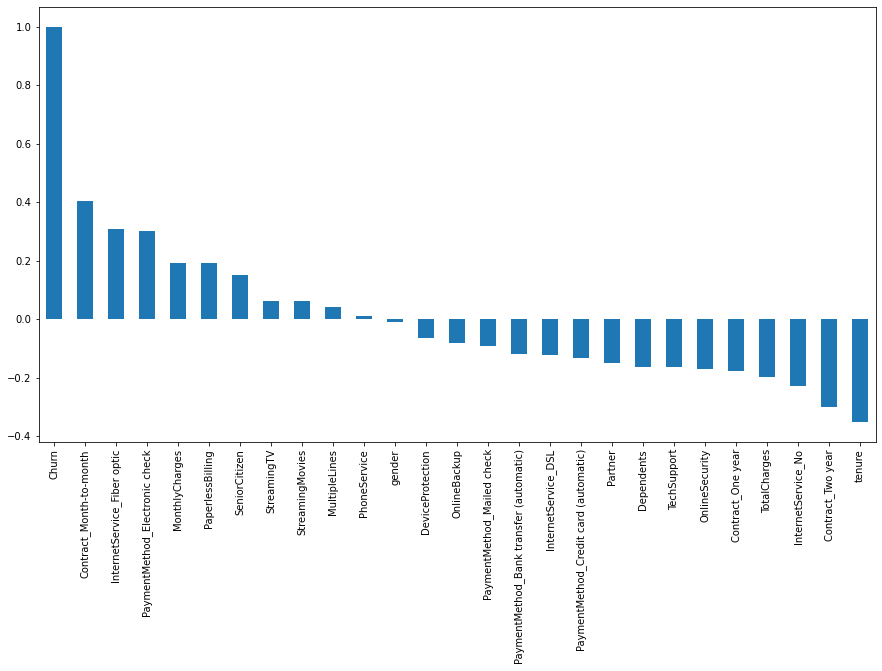

In [88]:
# Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15, 8))
df_Telecom.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

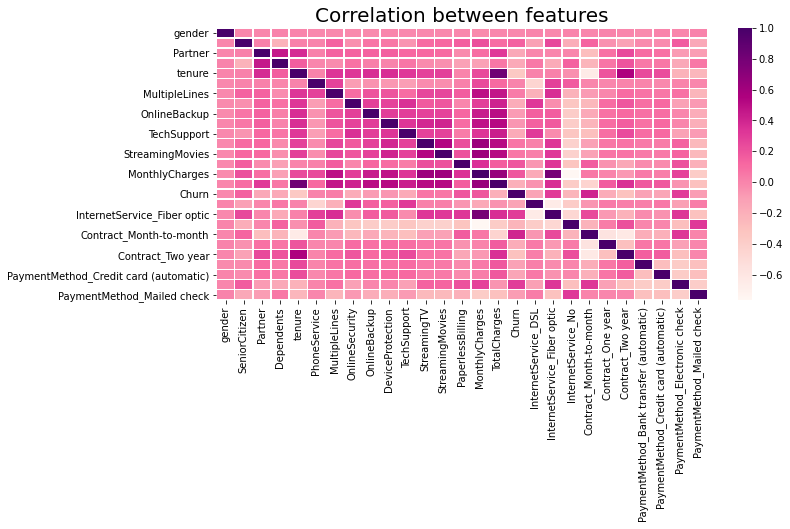

In [89]:
# correlation map
f, ax = plt.subplots(figsize=(11, 5))
sns.heatmap(df_Telecom.corr(), linewidth=".5", cmap="RdPu", ax=ax)
plt.title("Correlation between features", fontsize=20)
plt.show()

In [90]:
# sorts all correlations with ascending sort.
df_Telecom.corr().unstack().sort_values().drop_duplicates()

InternetService_No       MonthlyCharges                -0.763557
tenure                   Contract_Month-to-month       -0.645561
InternetService_DSL      InternetService_Fiber optic   -0.640987
Contract_Month-to-month  Contract_Two year             -0.622633
Contract_One year        Contract_Month-to-month       -0.568744
                                                          ...   
MonthlyCharges           StreamingTV                    0.629603
                         TotalCharges                   0.651172
                         InternetService_Fiber optic    0.787066
TotalCharges             tenure                         0.826172
gender                   gender                         1.000000
Length: 352, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">

**There is high positive relation between TotalCharges and tenure 82%** 

**MonthlyCharges id positively corelated with  StreamingTV ,   TotalCharges  and  InternetService_Fiber optic**

**MonthlyCharges is highly negatively related with  InternetService_No** 
    </span>

### f. Split the data into 80% train and 20% test. [1 Marks]

In [91]:
# Arrange data into independent variables and dependent variables
X = df_Telecom.drop("Churn", axis="columns")
y = df_Telecom.Churn  # Target Variable

In [92]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [93]:
X_train.shape

(5634, 26)

In [94]:
X_test.shape

(1409, 26)

### g. Normalize/Standardize the data with the best suitable approach. [2 Marks]

In [95]:
df_Telecom.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count   7043.000000    7043.000000     7043.000000   7043.000000   
mean       0.903166       0.421837        0.286668      0.344881   
std        0.295752       0.493888        0.452237      0.475363   
min        0.000000       0.000000        0.000000      0.000000   
25%        1.000000       0.000000        0.000000      0.000000   
50%        1.000000       0.000000        0.000000      0.000000   
75%        1.000000       1.000000        1.000000      1.000000   
max        1.000000       1.000000        1.000000      1.000000   

       DeviceProtection  ...  InternetService_DSL  \
count       7043.000000  ...          7043.000000   
mean           0.343888  ...             0.343746   
std            0.475038  ...             0.474991   
min            0.000000  ...             0.000000   
25%            0.000000  ...             0.000000   
50%            0.000000  ...             0.000000   
75%            1.000000  ...             1.000000   
max            1.000000  ...             1.000000   

       InternetService_Fiber optic  InternetService_No  \
count                  7043.000000         7043.000000   
mean                      0.439585            0.216669   
std                       0.496372            0.412004   
min                       0.000000            0.000000   
25%                       0.000000            0.000000   
50%                       0.000000            0.000000   
75%                       1.000000            0.000000   
max                       1.000000            1.000000   

       Contract_Month-to-month  Contract_One year  Contract_Two year  \
count              7043.000000        7043.000000        7043.000000   
mean                  0.550192           0.209144           0.240664   
std                   0.497510           0.406726           0.427517   
min                   0.000000           0.000000           0.000000   
25%                   0.000000           0.000000           0.000000   
50%                   1.000000           0.000000           0.000000   
75%                   1.000000           0.000000           0.000000   
max                   1.000000           1.000000           1.000000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7043.000000   
mean                                  0.219225   
std                                   0.413751   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7043.000000                     7043.000000   
mean                                0.216101                        0.335794   
std                                 0.411613                        0.472301   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000         

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
Scaling all the variables to a range of 0 to 1 with Normalization

All Categorical features are already in the range between 0 to 1. and normalization would not affect their value.

Standardizing the categorical features would mean assigning a distribution to categorical features.We don’t want to do that!

 </span>


In [96]:
# data normalization with sklearn

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)



In [97]:
# Scaled training data
print(X_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]]


In [98]:
# Scaled test data
print(X_test)

[[0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


## 3. Model building and Improvement: 10


## a. Train a model using XGBoost and use RandomizedSearchCV to train on best parameters. Also print best performing parameters along with train and test performance. [5 Marks]

In [99]:
#XGBoost
xgb_model = XGBClassifier()

# fit the model with the training data
xgb_model.fit(X_train,y_train)

# predict the target on the train dataset
y_predict_train=xgb_model.predict(X_train)
print('\nTarget on train data',y_predict_train) 

# predict the target on the test dataset
y_predict_test = xgb_model.predict(X_test)
print('\nTarget on test data',y_predict_test) 


[16:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Target on train data [0 0 1 ... 0 1 0]

Target on test data [1 0 0 ... 0 0 0]


### Model Score

In [100]:
print("Model Score for Training data:", np.round(xgb_model.score(X_train, y_train), 2))
print("Model Score for Test data:", np.round(xgb_model.score(X_test, y_test), 2))

Model Score for Training data: 0.94
Model Score for Test data: 0.8


### Classification report for Training Set

In [101]:
# Training Set
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4138
           1       0.91      0.85      0.88      1496

    accuracy                           0.94      5634
   macro avg       0.93      0.91      0.92      5634
weighted avg       0.94      0.94      0.94      5634



### Classification report for Test Set

In [102]:
# Test Set
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
    From the classification report, it can be seen that the model has an average weighted performance of around 80% ranging from precision, recall, f1-score, and support.
Test Recall is less in comparative to Training 
</span>

In [103]:
accuracy = []
recall = []
roc_auc = []
precision = []

# y_pred = model.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_predict_test), 4))
recall.append(round(recall_score(y_test, y_predict_test), 4))
roc_auc.append(round(roc_auc_score(y_test, y_predict_test), 4))
precision.append(round(precision_score(y_test, y_predict_test), 4))

model_names = ["XGBoost_Default"]
result_df4 = pd.DataFrame(
    {
        "Accuracy": accuracy,
        "Recall": recall,
        "Roc_Auc": roc_auc,
        "Precision": precision,
    },
    index=model_names,
)
result_df4

Accuracy  Recall  Roc_Auc  Precision
XGBoost_Default     0.797  0.5255   0.7101     0.6426

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
With the default parameters, XGBoost get 0.52 Recall and 0.64 Roc_Auc.
Also Recall s for Training data is 0.85 which concludes model is overfit
    </span>

XGBoost correctly predicted less than half of the churned customers.

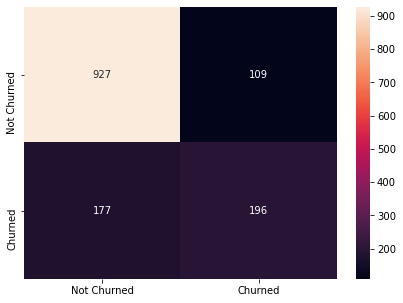

In [104]:
# Test Set
cm_Test = confusion_matrix(y_test, y_predict_test, labels=[0, 1])
df_cm = pd.DataFrame(
    cm_Test,
    index=[i for i in ["Not Churned", "Churned"]],
    columns=[i for i in ["Not Churned", "Churned"]],
)
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="g")
plt.show()

### SMOTE Algorithm

In [105]:
print("Before OverSampling, counts: \n", y.value_counts())

smote_nc = SMOTENC(
    categorical_features=[1, 3, 5], random_state=42
)  # specifying categorical column numbers
x_s, y_s = smote_nc.fit_resample(X, y)

print("\nAfter OverSampling, counts  : \n", y_s.value_counts())

print("\nAfter OverSampling, the shape of train_X: {}".format(x_s.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_s.shape))

Before OverSampling, counts: 
 0    5174
1    1869
Name: Churn, dtype: int64

After OverSampling, counts  : 
 0    5174
1    5174
Name: Churn, dtype: int64

After OverSampling, the shape of train_X: (10348, 26)
After OverSampling, the shape of train_y: (10348,) 



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
    
We can see the target is balanced after sampling

SMOTE Algorithm has oversampled the minority instances and made them equal to the majority class.

Both categories have an equal amount of records.

More specifically, the minority class has been increased to the total number of the majority class.

Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling).
    
</span>

### Again train the same previous model on balanced data

In [106]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    x_s, y_s, test_size=0.30, random_state=10
)

In [107]:
#XGBoost
xgb_model = XGBClassifier()

# fit the model with the training data
xgb_model.fit(X_train,y_train)

# predict the target on the train dataset
y_predict_train=xgb_model.predict(X_train)
print('\nTarget on train data',y_predict_train) 

# predict the target on the test dataset
y_predict_test = xgb_model.predict(X_test)
print('\nTarget on test data',y_predict_test) 


[16:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Target on train data [0 1 0 ... 0 1 0]

Target on test data [0 0 1 ... 1 0 0]


### Classification report for Training Set

In [108]:
# Training Set
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3593
           1       0.96      0.97      0.97      3650

    accuracy                           0.97      7243
   macro avg       0.97      0.97      0.97      7243
weighted avg       0.97      0.97      0.97      7243



### Classification report for Test Set

In [109]:
# Test Set
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1581
           1       0.84      0.85      0.84      1524

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
From the classification report,we can see there is increase in accuracy.
Also test recall score is increased from 54% to 85 % which is good.
    
</span>

In [110]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {"n_estimators": [25], "max_depth": range(2, 12)}
# Instantiate the regressor: gbm
gbm = xgb.XGBClassifier(n_estimators=10)
# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(
    param_distributions=gbm_param_grid,
    estimator=gbm,
    scoring="accuracy",
    n_iter=5,
    cv=4,
    verbose=1,
)
# Fit randomized_mse to the data
randomized_mse.fit(X_train, y_train)


Fitting 4 folds for each of 5 candidates, totalling 20 fits
[16:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:13]

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=10, n_jobs=None,
                                           num_parallel_tree=None,
                                      

In [111]:
# print best parameter after tuning
print("Best parameters found: ", randomized_mse.best_params_)

# Trainig Set
rmse_pred_train = randomized_mse.predict(X_train)
# Test Set
rmse_pred_test = randomized_mse.predict(X_test)

Best parameters found:  {'n_estimators': 25, 'max_depth': 6}


### Classification report for Training Set

In [112]:
# Training Set
print(classification_report(y_train, rmse_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3593
           1       0.90      0.91      0.91      3650

    accuracy                           0.90      7243
   macro avg       0.90      0.90      0.90      7243
weighted avg       0.90      0.90      0.90      7243



### Classification report for Test Set

In [113]:
# Test Set
print(classification_report(y_test, rmse_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1581
           1       0.84      0.84      0.84      1524

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">

From the classification report,we can see there  is no change in accuracy, precision and recall and f1 score post RandomSerchCV Hypertuning parameter for minority class

Also test precision and recall and f1 score is decreased from 85% to 84 % .
 
Training accuracy is 97%
</span>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

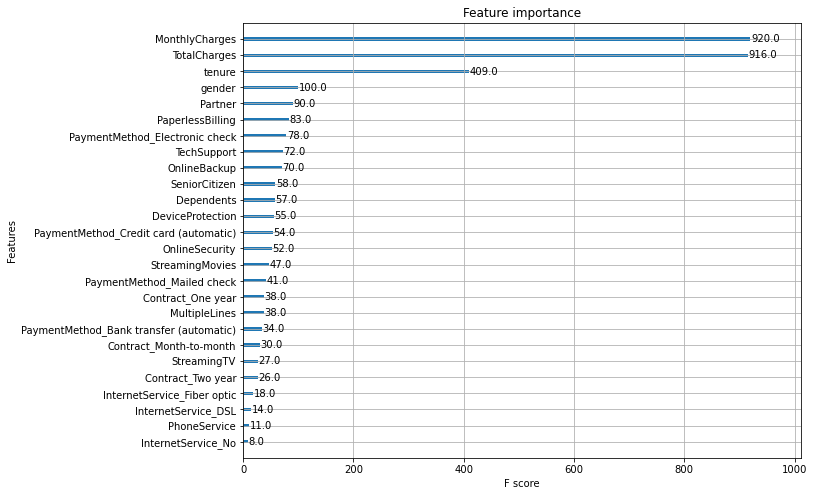

In [114]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
xgb_model.get_booster().feature_names = X.columns.to_list()
plot_importance(xgb_model, ax=ax)

## B. Train a model using XGBoost and use GridSearchCV to train on best parameters. Also print best performing parameters along with train and test performance. [5 Marks]

In [115]:

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    "colsample_bytree": [0.3, 0.7],
    "n_estimators": [50],
    "max_depth": [2, 5],
}
# Instantiate the Classifier: gbm
gbm = xgb.XGBClassifier(learning_rate=0.1, objective="binary:logistic", nthread=4, seed=27)
# Perform grid search: grid_mse
grid_mse = GridSearchCV(
    estimator=gbm,
    param_grid=gbm_param_grid,
    scoring="accuracy",
    cv=4,
    n_jobs=4,
    verbose=1,
)
grid_mse.fit(X_train, y_train)


Fitting 4 folds for each of 4 candidates, totalling 16 fits
[16:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_

In [116]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
# Trainig Sett
grid_mse_pred_train=xgb_model.predict(X_train)
# Test Set
grid_mse_pred_test = grid_mse.predict(X_test)


Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 50}


### Classification report for Training Set

In [117]:
# Training Set
print(classification_report(y_train, grid_mse_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3593
           1       0.96      0.97      0.97      3650

    accuracy                           0.97      7243
   macro avg       0.97      0.97      0.97      7243
weighted avg       0.97      0.97      0.97      7243



### Classification report for Test Set

In [118]:
# Test Set
print(classification_report(y_test, grid_mse_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1581
           1       0.83      0.86      0.84      1524

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
From the classification report,we can see there  is no change in accuracy, precision and recall and f1 score post GridSearchCV Hypertuning parameter for minority class

Also test precision and recall and f1 score is increased from 85% to 86 % .
 
Training accuracy is 97% not affected
</span>

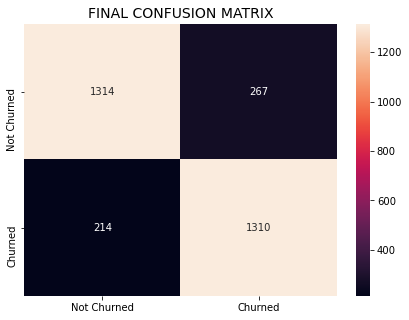

In [119]:
# Test Set
cm_Test = confusion_matrix(y_test, grid_mse_pred_test, labels=[0, 1])
df_cm = pd.DataFrame(
    cm_Test,
    index=[i for i in ["Not Churned", "Churned"]],
    columns=[i for i in ["Not Churned", "Churned"]],
)
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="g")
plt.title("FINAL CONFUSION MATRIX", fontsize=14)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">
Customer churn is definitely bad to a firm ’s profitability.
Various strategies can be implemented to eliminate customer churn.
The best way to avoid customer churn is  Improving customer service is,  Building customer loyalty through relevant experiences and specialized service .

 </span>

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">PART TWO | TOTAL | 30 </span></div>

## DOMAIN: IT

## • CONTEXT: 
The purpose is to build a machine learning pipeline that will work autonomously irrespective of Data and users can save efforts involved in building pipelines for each dataset.

## • PROJECT OBJECTIVE:
Build a machine learning pipeline that will run autonomously with the csv file and return best performing model.

## • STEPS AND TASK [30 Marks]:
1. Build a simple ML pipeline which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1
Dataset from Part 1 (single/merged).
2. Create separate functions for various purposes.
3. Various base models should be trained to select the best performing model.
4. Pickle file should be saved for the best performing model.

### Include best coding practices in the code:

• Modularization

• Maintainability

• Well commented code etc.

<div class= "alert alert-success"><span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">
    1. Data Understanding: </span></div>

In [120]:
# load a dataset
def load_dataset():
    ## Importing the datasets
    df_telcom_Churn1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
    df_telcom_Churn2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
    # Merge 2 dataframes on "customerID"
    df = pd.merge(df_telcom_Churn1, df_telcom_Churn2, how="inner", on="customerID")
    return df

In [121]:
def dataOverview(df, message):
    print(f"{message}:\n")
    print(
        "DataFrames",
        "\tRows",
        "\tColumns" "\n\nTelecom\t\t",
        df.shape[0],
        "\t",
        df.shape[1],
    )
    print("\nFeatures:")
    print(df.columns.tolist())  # Column List

    print("\nDatatype:")
    print(df.dtypes)  # Normal Datatype

    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [122]:
# function to print the total percentage of the missing values.
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)
    return pd.concat([total, percent], axis=1, keys=["Total", "Percent"])

In [123]:
# function to Check for space in any columns
def check_for_space(df):
    for col in df.select_dtypes(include=["object"]):
        print(col, df[col].str.isspace().sum())

In [124]:
def ImputeData(df_Telecom_churn):
    # Replace space with mode
    df_Telecom_churn.TotalCharges.loc[
        df_Telecom_churn["TotalCharges"].str.isspace()
    ] = df_Telecom_churn.TotalCharges.mode()[1]

    # Check for any space
    return df_Telecom_churn

In [125]:
def check_for_unexpectedValue(df):
    for col in df.select_dtypes(include=["object"]):
        print(col, df[col].unique())

In [126]:
def Update_column_Value(df_Telecom_churn):
    # Update value of column MultipleLines "No phone service" to  "No"
    df_Telecom_churn.MultipleLines.loc[df_Telecom_churn["MultipleLines"] == "No phone service"] = "No"

    
    # Update value of column  "No internet service" to  "No"
    cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

    for col in cols:
        df_Telecom_churn[col].loc[df_Telecom_churn[col] == "No internet service"] = "No"
           
    return df_Telecom_churn


In [127]:
def Modify_column(df_Telecom_churn):
    # TotalCharges id of type object to to converted to float
    df_Telecom_churn.TotalCharges = df_Telecom_churn.TotalCharges.astype("float64")

    # drop customer id
    df_Telecom_churn = df_Telecom_churn.drop("customerID", axis=1)

    # SeniorCitizen of type int64 to to converted to object
    df_Telecom_churn.SeniorCitizen = df_Telecom_churn.SeniorCitizen.astype("object")

    return df_Telecom_churn

In [128]:
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return outliers

In [129]:
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

In [130]:
def Total_Outliers(df_Telecom_churn):
    col = numerical_cols
    TotalOutliers = 0

    for i in col:
        sample_outliers = []
        sample_outliers = detect_outliers(df_Telecom_churn[i])
        print("\n\nTotal Number of outliers in ", i, "is :", len(sample_outliers))

In [131]:
def Display_boxplot(df_Telecom_churn):
    f, ax = plt.subplots(figsize=(11, 5))
    sns.boxplot(data=df_Telecom_churn[numerical_cols], palette="Set3")
    plt.show()

In [132]:
# Function to plot pie charts for all categorical features
def DisplayPercentageDistribution(df):

    fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 25))
    for i, col in enumerate(df):
        # Creating dataset
        data = df[col].value_counts().values.tolist()

        labels = df[col].value_counts().index.tolist()

        title = col

        # Creating explode data
        explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

        # define Seaborn color palette to use
        colors = sns.color_palette("bright")[0:5]
        # Wedge properties
        wp = {"linewidth": 1, "edgecolor": "green"}

        # Creating plot
        ax = axes[i // 2, i % 2]
        wedges, texts, autotexts = ax.pie(
            data,
            # explode=explode,
            labels=labels,
            shadow=True,
            colors=colors,
            startangle=90,
            wedgeprops=wp,
            autopct="%.0f%%",
        )

        # Adding legend
        ax.legend(wedges, labels, title=title, bbox_to_anchor=(1.5, 0, 0.5, 1))
        ax.set_title(title,)

    # show plot
    plt.show()

In [133]:
def Display_CountPlot(df):
    for i, col in enumerate(df):
        fig = px.histogram(df, x="Churn", color=col, barmode="group", title="<b>Customer "+col+" distribution<b>")
        fig.update_layout(width=700, height=500, bargap=0.1)
        fig.show()


In [134]:
def Display_distplot(feature, frame, color="r"):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color=color)

In [135]:
def transformation(df_Telecom):
    df_nUnique = df_Telecom.nunique()
    # Target columns
    target_col = ["Churn"]
    # categorical columns
    cat_cols = df_nUnique[df_nUnique < 10].keys().tolist()
    cat_cols = [x for x in cat_cols if x not in target_col]
    # numerical columns
    num_cols = [x for x in df_nUnique.keys() if x not in cat_cols + target_col]
    # Binary columns with 2 values
    bin_cols = df_nUnique[df_nUnique == 2].keys().tolist()
    # Columns more than 2 values
    multi_cols = [i for i in cat_cols if i not in bin_cols]

    print("Label encoding for Binary columns: ", bin_cols)
    # Label encoding Binary columns
    le = LabelEncoder()
    for i in bin_cols:
        df_Telecom[i] = le.fit_transform(df_Telecom[i])

    print("\n")
    print("One Hot Encoding Multi Value columns ", multi_cols)
    # one Hot Encoding of columns for multi value columns
    df_Telecom = pd.get_dummies(data=df_Telecom, columns=multi_cols)

    print("\n")
    print("Scaling Numerical columns ", num_cols)

    return df_Telecom

### Group similar functions

In [136]:
def preprocessing_(df):
    missing_percentage(df)

    # Check for space
    check_for_space(df)
    # Impute Nan data to mode
    df = ImputeData(df)

    # Check for unexpected character
    check_for_unexpectedValue(df)

    # update values to Yes/ No
    df = Update_column_Value(df)

    # all the variables with continuous values,drop not required column
    df = Modify_column(df)

    return df

In [137]:
def visualization_(df):
    # Check for any outlier
    Total_Outliers(df)

    # Display Boxplot
    Display_boxplot(df)

    # Pie chart PercentageDistribution
    DisplayPercentageDistribution(df.select_dtypes(include=["object"]))

    # Display Churn Count Plot
    # Display_CountPlot(df)

    # Displot
    num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
    for feat in num_cols:
        Display_distplot(feat, df)

### Calling function

In [138]:
def main():
    # loading dataset
    df = load_dataset()

    # Data Understanding
    dataOverview(df, "Overiew of the dataset")

    # Data Preprocessing
    df = preprocessing_(df)

    # Data Visualization
    visualization_(df)

    # Data Transformation
    df = transformation(df)

    return df

Overiew of the dataset:

DataFrames 	Rows 	Columns

Telecom		 7043 	 21

Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Datatype:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                o

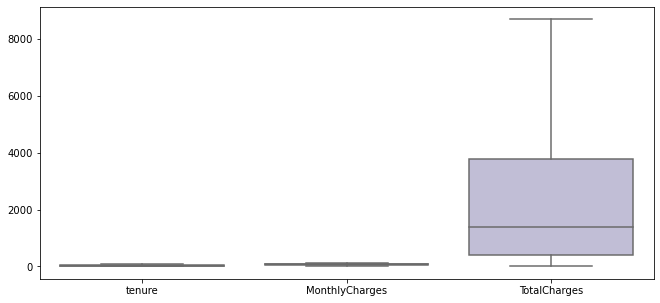

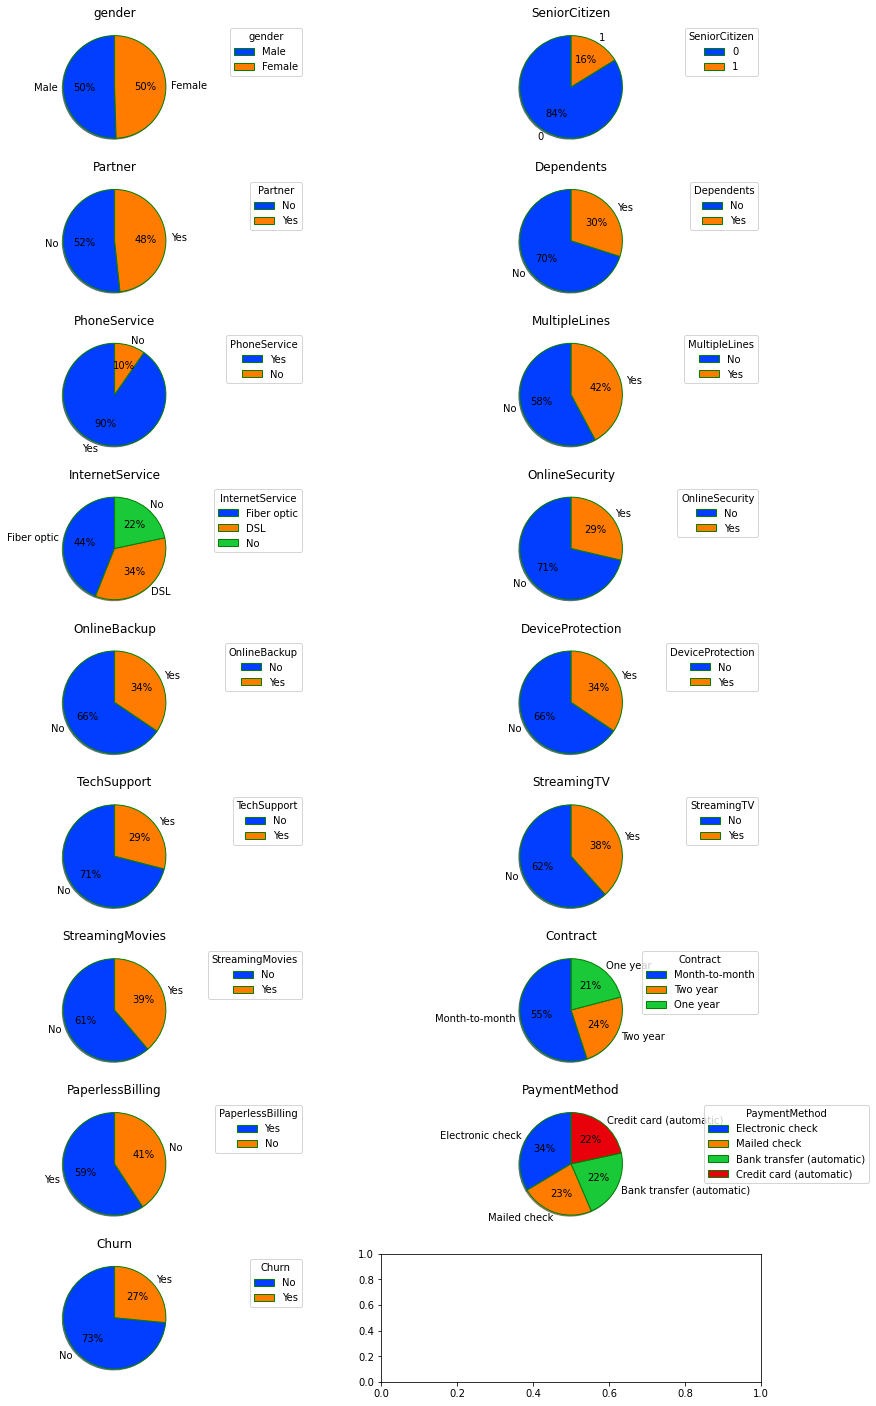

Label encoding for Binary columns:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


One Hot Encoding Multi Value columns  ['InternetService', 'Contract', 'PaymentMethod']


Scaling Numerical columns  ['tenure', 'MonthlyCharges', 'TotalCharges']


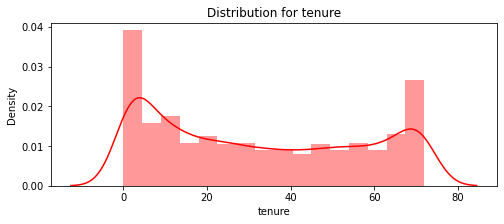

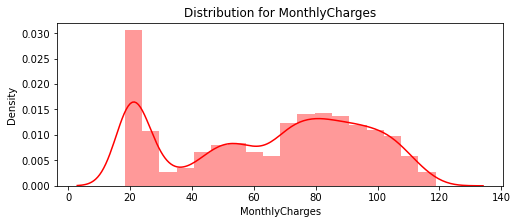

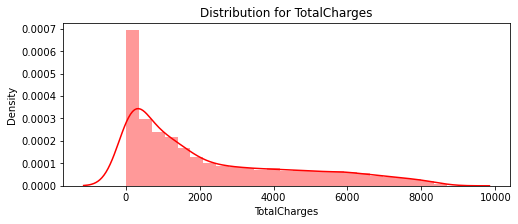

In [139]:
df_churn = main()


## Model Building

In [140]:
# Arrange data into independent variables and dependent variables
X = df_churn.drop("Churn", axis="columns")
y = df_churn.Churn  # Target Variable

# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#data normalization with sklearn

#fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)



## Base models

In [141]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y):
    # model fit
    algorithm.fit(training_x, training_y)

    # Trainig Sett
    pred_train = algorithm.predict(training_x)
    # Test Set
    pred_test = algorithm.predict(testing_x)

    # Training Set
    print("Training Set")
    print(classification_report(training_y, pred_train))

    # Test Set
    print("Test Set")
    print(classification_report(testing_y, pred_test))

    # Test Set
    cm_Test = confusion_matrix(y_test, pred_test, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm_Test,
        index=[i for i in ["Not Churned", "Churned"]],
        columns=[i for i in ["Not Churned", "Churned"]],
    )
    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=True, fmt="g")
    plt.title("CONFUSION MATRIX", fontsize=14)
    plt.show()

    # Test Set

### LogisticRegression

Training Set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4138
           1       0.65      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634

Test Set
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



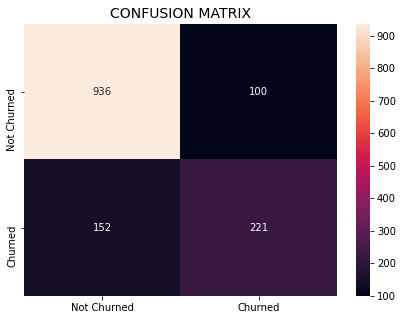

In [142]:
# Baseline model :LogisticRegression
logit = LogisticRegression(
    C=1.0,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    max_iter=100,
    multi_class="ovr",
    n_jobs=1,
    penalty="l2",
    random_state=None,
    solver="liblinear",
    tol=0.0001,
    verbose=0,
    warm_start=False,
)

telecom_churn_prediction(
    logit, X_train, X_test, y_train, y_test,
)

### DecisionTreeClassifier

In [143]:
def treeplot(classifier, cols, classnames):
    # plot decision tree
    graph = Source(
        tree.export_graphviz(
            classifier,
            out_file=None,
            rounded=True,
            proportion=False,
            feature_names=cols,
            precision=2,
            class_names=classnames,
            filled=True,
        )
    )
    display(graph)

Training Set
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4138
           1       0.75      0.66      0.70      1496

    accuracy                           0.85      5634
   macro avg       0.82      0.79      0.80      5634
weighted avg       0.85      0.85      0.85      5634

Test Set
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1036
           1       0.56      0.51      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



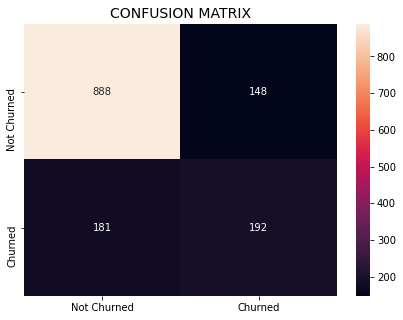

In [148]:
# Baseline model :DecisionTreeClassifier
from graphviz import Source
from IPython.display import SVG, display
from sklearn import tree

decision_tree = DecisionTreeClassifier(
    max_depth=9, random_state=123, splitter="best", criterion="gini"
)

telecom_churn_prediction(decision_tree, X_train, X_test, y_train, y_test)

# plot decision tree
#treeplot(decision_tree, X.columns.to_list(), ["Not churn", "Churn"])

### KNeighborsClassifier

Training Set
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4138
           1       0.71      0.65      0.68      1496

    accuracy                           0.84      5634
   macro avg       0.79      0.78      0.78      5634
weighted avg       0.83      0.84      0.83      5634

Test Set
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.56      0.52      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



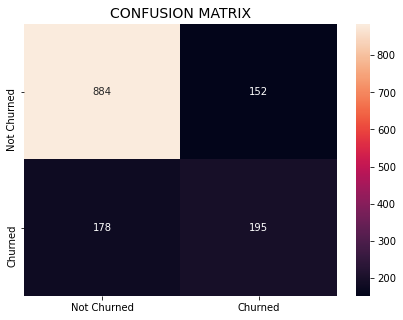

In [149]:
knn = KNeighborsClassifier(
    algorithm="auto",
    leaf_size=30,
    metric="minkowski",
    metric_params=None,
    n_jobs=1,
    n_neighbors=5,
    p=2,
    weights="uniform",
)
telecom_churn_prediction(knn, X_train, X_test, y_train, y_test)

### RandomForestClassifier

Training Set
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4138
           1       0.76      0.61      0.68      1496

    accuracy                           0.85      5634
   macro avg       0.82      0.77      0.79      5634
weighted avg       0.84      0.85      0.84      5634

Test Set
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



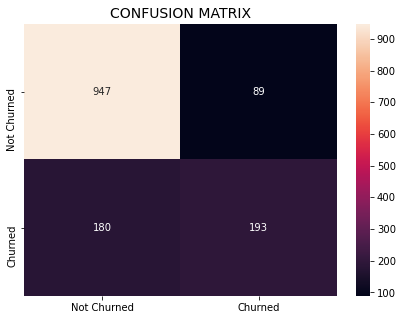

In [150]:
rfc = RandomForestClassifier(
    n_estimators=10, random_state=123, max_depth=9, criterion="gini"
)

telecom_churn_prediction(rfc, X_train, X_test, y_train, y_test)

### XGBClassifier

[16:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Set
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4138
           1       0.80      0.67      0.73      1496

    accuracy                           0.87      5634
   macro avg       0.85      0.81      0.82      5634
weighted avg       0.87      0.87      0.87      5634

Test Set
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



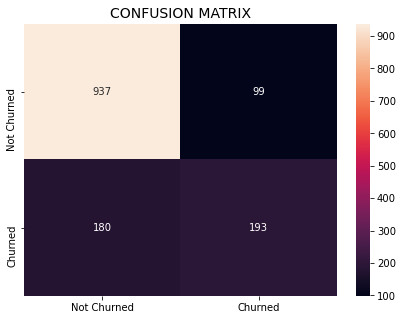

In [151]:
xgc = XGBClassifier(learning_rate=0.1, objective="binary:logistic", nthread=4, seed=27)

telecom_churn_prediction(xgc, X_train, X_test, y_train, y_test)

### AdaBoostClassifier

Training Set
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4138
           1       0.67      0.53      0.59      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.73      5634
weighted avg       0.80      0.81      0.80      5634

Test Set
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



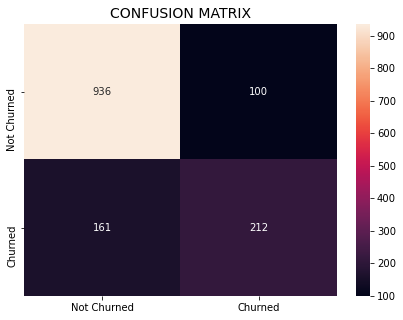

In [152]:
adac = AdaBoostClassifier(random_state=124)

telecom_churn_prediction(adac, X_train, X_test, y_train, y_test)

### BaggingClassifier

Training Set
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4138
           1       0.99      0.94      0.97      1496

    accuracy                           0.98      5634
   macro avg       0.99      0.97      0.98      5634
weighted avg       0.98      0.98      0.98      5634

Test Set
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1036
           1       0.61      0.42      0.49       373

    accuracy                           0.77      1409
   macro avg       0.71      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



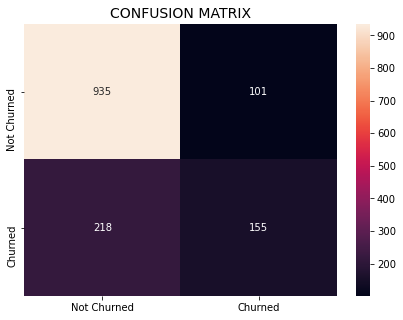

In [153]:
bgc = BaggingClassifier(random_state=124)

telecom_churn_prediction(bgc, X_train, X_test, y_train, y_test)

In [154]:
# gives model report in dataframe
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
    f1score = f1_score(testing_y, predictions)

    df = pd.DataFrame(
        {
            "Model": [name],
            "Accuracy": [accuracy],
            "Recall": [recallscore],
            "Precision": [precision],
            "f1-score": [f1score],
            "Roc_auc": [roc_auc],
        }
    )
    return df

In [155]:
# putting all the model names, model classes and the used columns in a dictionary
models = {
    "Logistic (Baseline)": [logit, cols],
    "Decision Tree": [decision_tree, cols],
    "KNN Classifier": [knn, cols],
    "Random Forest": [rfc, cols],
    "XGBoost Classifier": [xgc, cols],
    "AdaBoost": [adac, cols],
    "Bagging Classifier": [bgc, cols],
}

In [156]:
model_performances_train = pd.DataFrame()
for name in models:
    model_performances_train = model_performances_train.append(
        model_report(models[name][0], X_train, X_test, y_train, y_test, name,),
        ignore_index=True,
    )

[16:12:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [157]:
model_performances_train

Model  Accuracy    Recall  Precision  f1-score   Roc_auc
0  Logistic (Baseline)  0.821150  0.592493   0.688474  0.636888  0.747984
1        Decision Tree  0.766501  0.514745   0.564706  0.538569  0.685944
2       KNN Classifier  0.765791  0.522788   0.561960  0.541667  0.688035
3        Random Forest  0.809084  0.517426   0.684397  0.589313  0.715759
4   XGBoost Classifier  0.801987  0.517426   0.660959  0.580451  0.710933
5             AdaBoost  0.814762  0.568365   0.679487  0.618978  0.735920
6   Bagging Classifier  0.773598  0.415550   0.605469  0.492846  0.659030

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue">  Logistic Algorithm is best in all the model as its accuracy is highest 82%</span>

## ML Pipeline

In [158]:
from sklearn.pipeline import Pipeline
# Construct some pipelines
pipe_lr = Pipeline([("scl", StandardScaler()), ("clf", logit)])

pipe_dt = Pipeline([("scl", StandardScaler()), ("clf", decision_tree)])

pipe_rf = Pipeline(
    [("scl", StandardScaler()), ("clf", RandomForestClassifier(random_state=42))]
)

pipe_knn = Pipeline(
    [("scl", StandardScaler()), ("clf", knn)]
)

pipe_xgc = Pipeline([("scl", StandardScaler()), ("clf", xgc)])

pipe_adac = Pipeline(
    [("scl", StandardScaler()),  ("clf", adac)]
)

pipe_bgc = Pipeline(
    [("scl", StandardScaler()),  ("clf", bgc)]
)

In [159]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]
max_depth_range = [4, 5, 6, 7, 8, 9, 10, 11, 12]

grid_params_lr = [
    {
        "clf__penalty": ["l1", "l2"],
        "clf__C": param_range_fl,
        "clf__solver": ["liblinear"],
    }
]

grid_params_rf = [
    {
        "clf__criterion": ["gini"],
        "clf__min_samples_leaf": param_range,
        "clf__max_depth": param_range,
        "clf__min_samples_split": param_range[1:],
    }
]


grid_params_dt = [{"clf__criterion": ["gini"]}]

grid_params_knn = [
    {
        "clf__algorithm": ["auto"],
        "clf__leaf_size": [25, 23, 24],
        "clf__metric": ["minkowski"],
        "clf__n_neighbors": [5],
        "clf__p": [2],
        "clf__weights": ["uniform"],
    }
]
grid_params_xgc = [
    {
        "clf__learning_rate": [0.1],
        "clf__objective": ["binary:logistic"],
        "clf__nthread": [4],
        "clf__seed": [27],
    }
]

grid_params_adac = [{"clf__random_state": [124]}]
grid_params_bgc = [{"clf__random_state": [124]}]

In [160]:
# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(
    estimator=pipe_lr, param_grid=grid_params_lr, scoring="accuracy", cv=10
)

gs_dt = GridSearchCV(
    estimator=pipe_dt, param_grid=grid_params_dt, scoring="accuracy", cv=10
)

gs_rf = GridSearchCV(
    estimator=pipe_rf, param_grid=grid_params_rf, scoring="accuracy", cv=10, n_jobs=jobs
)

gs_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=grid_params_knn,
    scoring="accuracy",
    cv=10,
    n_jobs=jobs,
)

gs_xgc = GridSearchCV(
    estimator=pipe_xgc,
    param_grid=grid_params_xgc,
    scoring="accuracy",
    cv=10,
    n_jobs=jobs,
)

gs_adac = GridSearchCV(
    estimator=pipe_adac,
    param_grid=grid_params_adac,
    scoring="accuracy",
    cv=10,
    n_jobs=jobs,
)

gs_bgc = GridSearchCV(
    estimator=pipe_bgc,
    param_grid=grid_params_bgc,
    scoring="accuracy",
    cv=10,
    n_jobs=jobs,
)

In [161]:
# List of pipelines for ease of iteration
# grids = [gs_lr, gs_dt, gs_rf, gs_knn, gs_xgc, gs_adac, gs_bgc]
grids = [gs_lr, gs_dt, gs_knn, gs_xgc, gs_adac, gs_bgc]

# Dictionary of pipelines and classifier types for ease of reference

grid_dict = {
    0: "Logistic Regression",
    1: "Decission Tree",
    2: "KNN",
    3: "XGBoost",
    4: "Ada Boost",
    5: "Bagging",
}

In [162]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])	
    # Fit grid search	
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])


Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.801
Test set accuracy score for best params: 0.823 

Estimator: Decission Tree
Best params: {'clf__criterion': 'gini'}
Best training accuracy: 0.760
Test set accuracy score for best params: 0.767 

Estimator: KNN
Best params: {'clf__algorithm': 'auto', 'clf__leaf_size': 25, 'clf__metric': 'minkowski', 'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'}
Best training accuracy: 0.754
Test set accuracy score for best params: 0.770 

Estimator: XGBoost
[16:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params: {'clf__learning_rate': 0.1, 'clf__nthread'

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:blue"> As per above pipeline GridsearchCV Logistic Regression is best classifier with highest accuracy score 82%</span>

In [163]:
# Save best grid search pipeline to file

import joblib

dump_file = "best_gs_pipeline.pkl"
joblib.dump(best_gs, dump_file, compress=1)
print("\nSaved %s grid search pipeline to file: %s" % (grid_dict[best_clf], dump_file))


Saved Logistic Regression grid search pipeline to file: best_gs_pipeline.pkl
